## MNIST KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
x_Train=train.drop(labels="label",axis=1)
y_Train=train["label"]

In [4]:
x_Train=x_Train/255
x_Test=test/255
x_Train=x_Train.values.reshape(-1,28,28,1)
x_Test=x_Test.values.reshape(-1,28,28,1)
print("x train shape",x_Train.shape)
print("x test shape",x_Test.shape)

x train shape (42000, 28, 28, 1)
x test shape (28000, 28, 28, 1)


In [5]:
X_train, X_val, ml_train, ml_val = train_test_split(x_Train, y_Train, test_size = 0.1, random_state=2)

In [6]:
from tensorflow.keras.utils import to_categorical
Y_train=to_categorical(y_Train,num_classes=10)

In [7]:
X_train, X_val, Y_train, Y_val = train_test_split(x_Train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_val shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_val shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_val shape (4200, 10)


In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x, ml_train)
train_accuracy = knn.score(train_x, ml_train)
test_accuracy = knn.score(test_x, ml_val) 
print(train_accuracy)
print(test_accuracy)
y_pred = knn.predict(test_x)

0.9902380952380953
0.9826190476190476


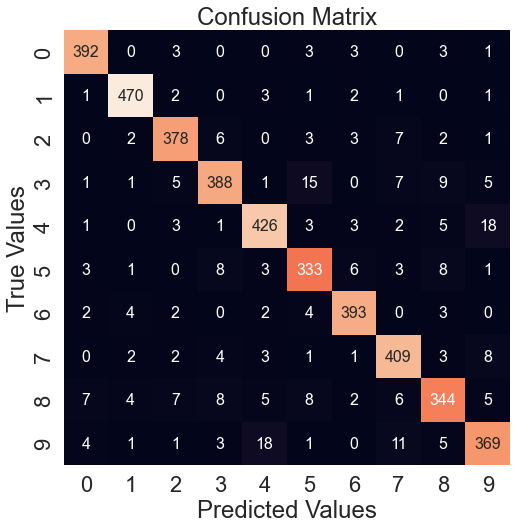

Accuracy: 0.929047619047619


In [57]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ml_val,y_pred)
fig = plt.figure(figsize=(8,8))

sns.set(font_scale=2)
sns.heatmap(mat.T, annot=True, cbar = False, annot_kws={'size': 16}, fmt='.0f')
    
plt.title("Confusion Matrix")
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

from sklearn.metrics import accuracy_score
print("Accuracy: " + accuracy_score(ml_val,y_pred).__str__())